In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import PercentFormatter
import torch
from db.db_query import (
    _get_ltv_data, get_fwd_credit_data,
    FIN_COL_NAMES, FWD_CTX_COL_NAMES
)
from datetime import date, timedelta

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# ltv
ids = [2947, 2948, 2949, 2950, 2951, 3037]
ltvs = _get_ltv_data(ids, release_window=730, release_count=8)

2020-04-22 10:07:54,883 INFO sqlalchemy.engine.base.Engine select version()
2020-04-22 10:07:54,884 INFO sqlalchemy.engine.base.Engine {}
2020-04-22 10:07:54,885 INFO sqlalchemy.engine.base.Engine select current_schema()
2020-04-22 10:07:54,886 INFO sqlalchemy.engine.base.Engine {}
2020-04-22 10:07:54,887 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-04-22 10:07:54,887 INFO sqlalchemy.engine.base.Engine {}
2020-04-22 10:07:54,888 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-04-22 10:07:54,889 INFO sqlalchemy.engine.base.Engine {}
2020-04-22 10:07:54,889 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2020-04-22 10:07:54,890 INFO sqlalchemy.engine.base.Engine {}
2020-04-22 10:07:54,891 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-04-22 10:07:54,893 INFO sqlalchemy.engine.base.Engine SELECT DISTINCT ON (corp_tx.cusip_id, corp_tx.trans_dt) financial.

In [128]:
data_path = 'output/corp_tx_ids/test.csv'
ids = np.genfromtxt(data_path, dtype=np.int).tolist()
data = []
for id in ids:
    data.append(get_fwd_credit_data([id], release_window=720, release_count=8, limit=8,
                                days_lower=30, days_upper=60))

X_fin, X_ctx = zip(*data)
X_fin, X_ctx = np.concatenate(X_fin, axis=0), np.concatenate(X_ctx, axis=0)
X_fin.shape, X_ctx.shape

((299920, 18), (37490, 7))

In [200]:
def histogram_plot(xs, labels, plot_shape=(3,3), bcount=10, tag='Feature', savepath=None):
    plt.clf()
    fig, axs = plt.subplots(*plot_shape, constrained_layout=True, figsize=(12, 7))
    # fig.suptitle(f'{tag} Data Distribution', fontsize='xx-large', fontweight='bold')
    for i, (label, ax) in enumerate(zip(labels, axs.flatten())):
        ax.hist(xs[:, i], weights=np.ones(len(xs[:, i]))/len(xs[:, i]), bins=bcount)
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
        ax.set_title(label, dict(fontsize='xx-large', fontweight='normal'))
    
    if savepath:
        plt.savefig(savepath)
    plt.show()

def single_hist(x, label, bcount=10, savepath=None):
    plt.clf()
    fig, ax = plt.subplots(constrained_layout=True)
    ax.hist(x, weights=np.ones(len(x))/len(x), bins=bcount)
    ax.title.set_text(label)
    
    if savepath:
        plt.savefig(savepath)
    plt.show()

<Figure size 432x288 with 0 Axes>

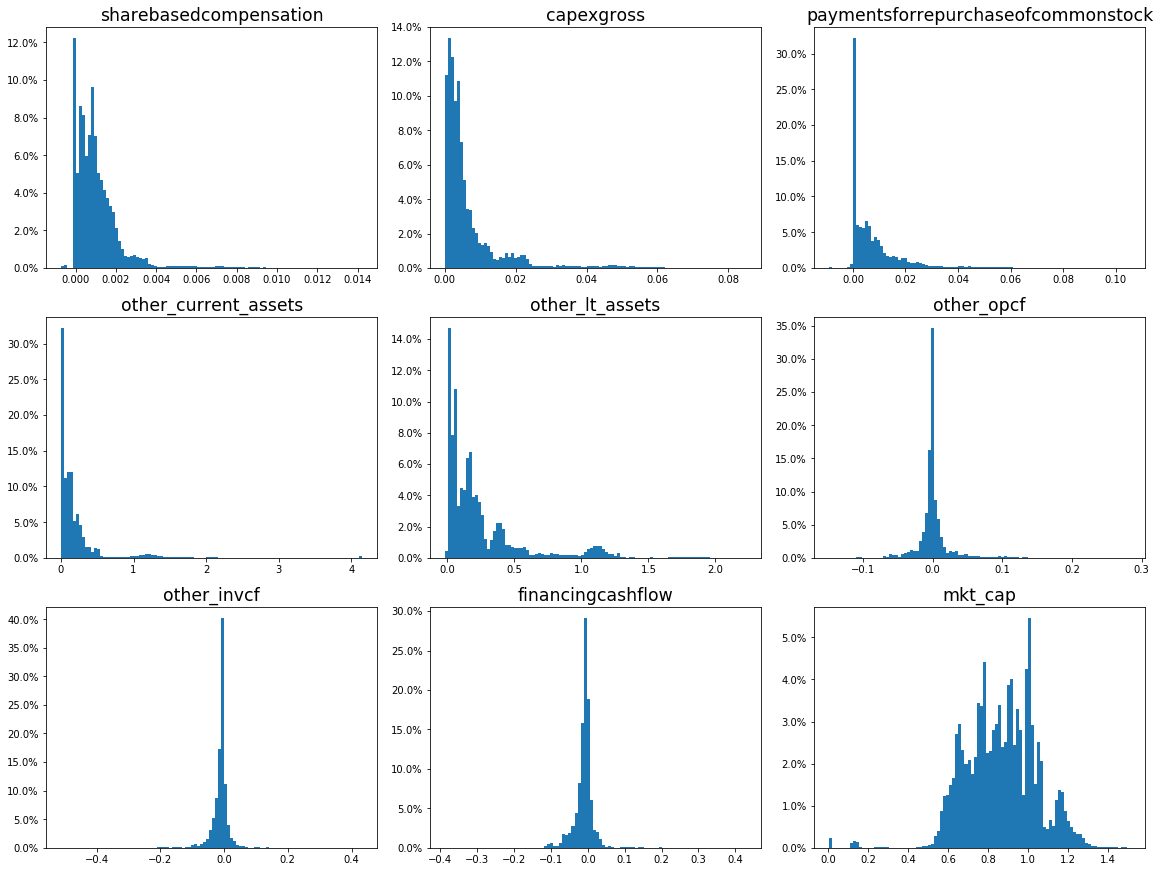

In [183]:
histogram_plot(X_fin[:, 9:], labels=FIN_COL_NAMES[9:], plot_shape=(3, 3), bcount=100,
               savepath='output/features/financial_feature_distributions_2.png')

<Figure size 432x288 with 0 Axes>

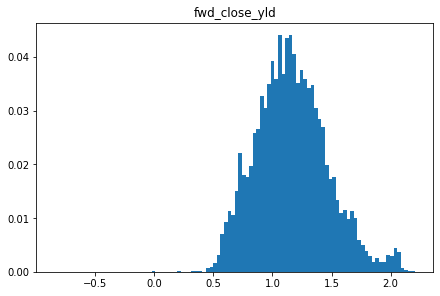

In [205]:
i = 6
single_hist(X_ctx[:, i], label=FWD_CTX_COL_NAMES[i], bcount=100,
            savepath=f'output/features/target_{FWD_CTX_COL_NAMES[i]}.png')

<Figure size 432x288 with 0 Axes>

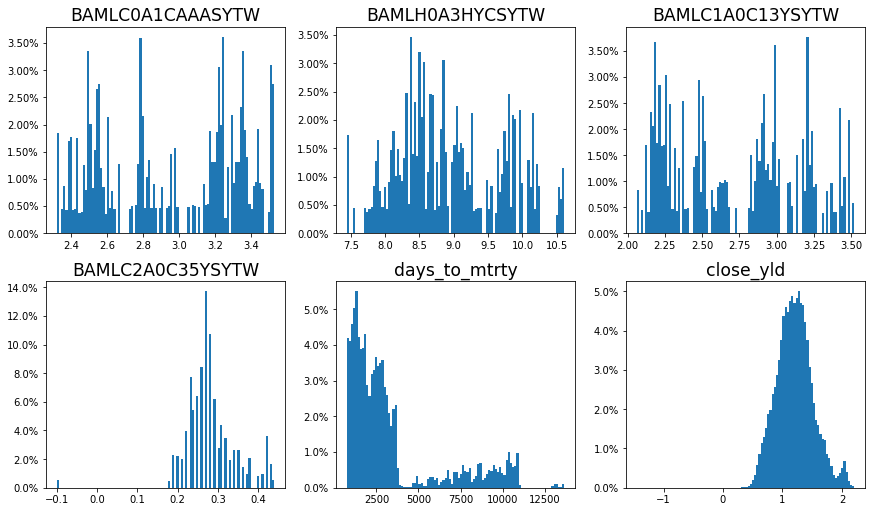

In [199]:
histogram_plot(X_ctx[:, :6], labels=FWD_CTX_COL_NAMES[:6], plot_shape=(2, 3), bcount=100,
               savepath='output/features/ctx_feats.png')

<Figure size 432x288 with 0 Axes>

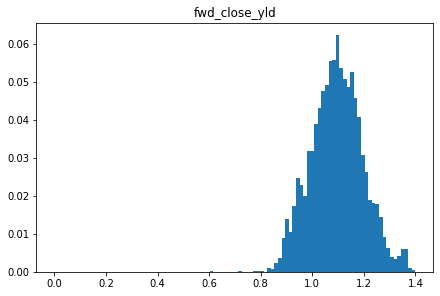

In [206]:
i = 6
vals = np.log(X_ctx[:, i]-np.amin(X_ctx[:, i])+1)
single_hist(vals, label=FWD_CTX_COL_NAMES[i], bcount=100,
            savepath=f'output/features/log_transform_{FWD_CTX_COL_NAMES[i]}.png')

<Figure size 432x288 with 0 Axes>

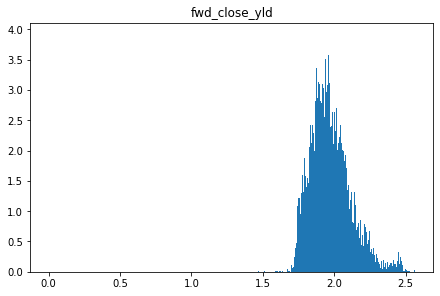

In [122]:
df = pd.DataFrame({'hey': [1,2,3], 'there': [4,5,6], 'you': [7,8,9]})
df

,hey,there,you
0,1,4,7
1,2,5,8
2,3,6,9


In [184]:
len(FWD_CTX_COL_NAMES)

7